In [134]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
directory = '/Users/astronely/PycharmProjects/DataAnalysisLabs/data-in/lab_4/'
artists = pd.read_csv(os.path.join(directory, 'artists.dat'), sep='\t')
tags = pd.read_csv(os.path.join(directory, 'tags.dat'), sep='\t')
user_artists = pd.read_csv(os.path.join(directory, 'user_artists.dat'), sep='\t')
user_friends = pd.read_csv(os.path.join(directory, 'user_friends.dat'), sep='\t')
user_tags = pd.read_csv(os.path.join(directory, 'user_taggedartists-timestamps.dat'), sep='\t')

user_tags['timestamp'] = pd.to_datetime(user_tags['timestamp'], unit='ms')

In [46]:
print(artists.shape)
artists.head()

(17632, 4)


,id,name,url,pictureURL
0,1,MALICE MIZER,http://www.last.fm/music/MALICE+MIZER,http://userserve-ak.last.fm/serve/252/10808.jpg
1,2,Diary of Dreams,http://www.last.fm/music/Diary+of+Dreams,http://userserve-ak.last.fm/serve/252/3052066.jpg
2,3,Carpathian Forest,http://www.last.fm/music/Carpathian+Forest,http://userserve-ak.last.fm/serve/252/40222717...
3,4,Moi dix Mois,http://www.last.fm/music/Moi+dix+Mois,http://userserve-ak.last.fm/serve/252/54697835...
4,5,Bella Morte,http://www.last.fm/music/Bella+Morte,http://userserve-ak.last.fm/serve/252/14789013...


In [45]:
print(tags.shape)
tags.head()

(11946, 2)


,tagID,tagValue
0,1,metal
1,2,alternative metal
2,3,goth rock
3,4,black metal
4,5,death metal


In [44]:
print(user_artists.shape)
user_artists.head()

(92834, 3)


,userID,artistID,weight
0,2,51,13883
1,2,52,11690
2,2,53,11351
3,2,54,10300
4,2,55,8983


In [42]:
print(user_friends.shape)
user_friends.head()

(25434, 2)


,userID,friendID
0,2,275
1,2,428
2,2,515
3,2,761
4,2,831


In [43]:
print(user_tags.shape)
user_tags.head()

(186479, 4)


,userID,artistID,tagID,timestamp
0,2,52,13,2009-03-31 22:00:00
1,2,52,15,2009-03-31 22:00:00
2,2,52,18,2009-03-31 22:00:00
3,2,52,21,2009-03-31 22:00:00
4,2,52,41,2009-03-31 22:00:00


In [68]:
user_artists.shape

(92834, 3)

In [85]:
def print_info(df_list, df_name):
    for i in range(len(df_list)):
        print(f"{df_name[i]}\n\n"
              f"Shape: {df_list[i].shape}\n\n"
              f"Info:")
        print(df_list[i].info(), '\n')
        print(f"Unique:\n{df_list[i].nunique()}\n"
              f"No duplicates: {len(df_list[i])==len(df_list[i].drop_duplicates())}")

In [86]:
df_list = [artists, tags, user_artists, user_friends, user_tags]
df_name = ["**Artists**", "**Tags**", "**User_artists**", "User_friends", "**User_tags**"]
print_info(df_list, df_name)

**Artists**

Shape: (17632, 4)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17632 entries, 0 to 17631
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          17632 non-null  int64 
 1   name        17632 non-null  object
 2   url         17632 non-null  object
 3   pictureURL  17188 non-null  object
dtypes: int64(1), object(3)
memory usage: 551.1+ KB
None 

Unique:
id            17632
name          17632
url           17632
pictureURL    17188
dtype: int64
No duplicates: True
**Tags**

Shape: (11946, 2)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11946 entries, 0 to 11945
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tagID     11946 non-null  int64 
 1   tagValue  11946 non-null  object
dtypes: int64(1), object(1)
memory usage: 186.8+ KB
None 

Unique:
tagID       11946
tagValue    11946
dtype: int64
No duplicates: True
**U

In [122]:
original_df = pd.merge(user_artists, artists, left_on="artistID", right_on="id", how="inner").drop(columns=["id", "url", "pictureURL"])
# artist_nd_tag = pd.merge(user_tags, tags, on="tagID", how="inner")
# original_df = pd.merge(user_nd_artist, artist_nd_tag, on=["userID", "artistID"], how="inner")

original_df.rename(columns={"name": "artistName", "weight": "artistWeight"}, inplace=True)
original_df

,userID,artistID,artistWeight,artistName
0,2,51,13883,Duran Duran
1,4,51,228,Duran Duran
2,27,51,85,Duran Duran
3,28,51,10,Duran Duran
4,62,51,528,Duran Duran
...,...,...,...,...
92829,2100,18726,337,Nyktalgia
92830,2100,18727,297,Atsakau niekadA
92831,2100,18728,281,Domantas Razauskas
92832,2100,18729,280,Atalyja


In [123]:
artist_rank = (original_df.groupby(['artistName']).agg({'userID':'count', 'artistWeight':'sum'}).rename(columns={'userID':'totalUniqueUsers', 'artistWeight':'totalArtistWeight'}).sort_values(['totalArtistWeight'], ascending=False))
artist_rank['avgUserPlays'] = artist_rank['totalArtistWeight']/artist_rank['totalUniqueUsers']

user_rank = (original_df.groupby(['userID']).agg({'artistName':'count','artistWeight':'sum'}).rename(columns={'artistName':'totalUniqueArtists','artistWeight':'totalUserPlays'}).sort_values(['totalUserPlays'],ascending=False))

In [124]:
artist_rank.head()

,totalUniqueUsers,totalArtistWeight,avgUserPlays
artistName,,,
Britney Spears,522,2393140,4584.559387
Depeche Mode,282,1301308,4614.567376
Lady Gaga,611,1291387,2113.563011
Christina Aguilera,407,1058405,2600.503686
Paramore,399,963449,2414.659148


In [125]:
user_rank.head()

,totalUniqueArtists,totalUserPlays
userID,,
757,50,480039
2000,50,468409
1418,50,416349
1642,50,388251
1094,50,379125


In [131]:
original = original_df.join(artist_rank, on='artistName', how='inner').join(user_rank, on='userID', how='inner').sort_values(['artistWeight'], ascending=False)
# original[original.duplicated(['userID', 'artistName'])]
original.head()

,userID,artistID,artistWeight,artistName,totalUniqueUsers,totalArtistWeight,avgUserPlays,totalUniqueArtists,totalUserPlays
2258,1642,72,352698,Depeche Mode,282,1301308,4614.567376,50,388251
35313,2071,792,324663,Thalía,26,350035,13462.884615,50,338400
26772,1094,511,320725,U2,185,493024,2664.994595,50,379125
7610,1905,203,257978,Blur,114,318221,2791.412281,50,276295
26140,1664,498,227829,Paramore,399,963449,2414.659148,50,251560


In [133]:
print_info([original[['userID', 'artistID']]], ['**Artist Weight**'])
print(f'Total plays: {original["artistWeight"].sum()}')

**Artist Weight**

Shape: (92834, 2)

Info:
<class 'pandas.core.frame.DataFrame'>
Index: 92834 entries, 2258 to 37593
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   userID    92834 non-null  int64
 1   artistID  92834 non-null  int64
dtypes: int64(2)
memory usage: 2.1 MB
None 

Unique:
userID       1892
artistID    17632
dtype: int64
No duplicates: True
Total plays: 69183975


In [144]:
from matplotlib import ticker


def bar_chart(x, y, x_label, y_label, title, caption, total_val):
    fig, ax = plt.subplots()
    fig.set_size_inches(16, 5)
    ax = sns.barplot(x=x[:20], y=y[:20], palette="PuRd")
    ax.set_xlabel(x_label, fontweight='bold')
    ax.set_ylabel(y_label, fontweight='bold')
    ax.set_title(title, fontweight='bold')
    ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: '{:,}'.format(int(x))))
    
    for p in ax.patches:
        height = p.get_height()
        pct = 100*(height/total_val)
        ax.text(p.get_x() + p.get_width()/2.,
                height + 3,
                '{:1.1f}%'.format(pct),
                ha='center', verticalalignment='bottom', color='black')
        ax.text(19, max(y[:20])*0.95, caption, style='italic', fontsize=12, horizontalalignment='right')
        
        plt.xticks(rotation=90)
    plt.show()
    

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


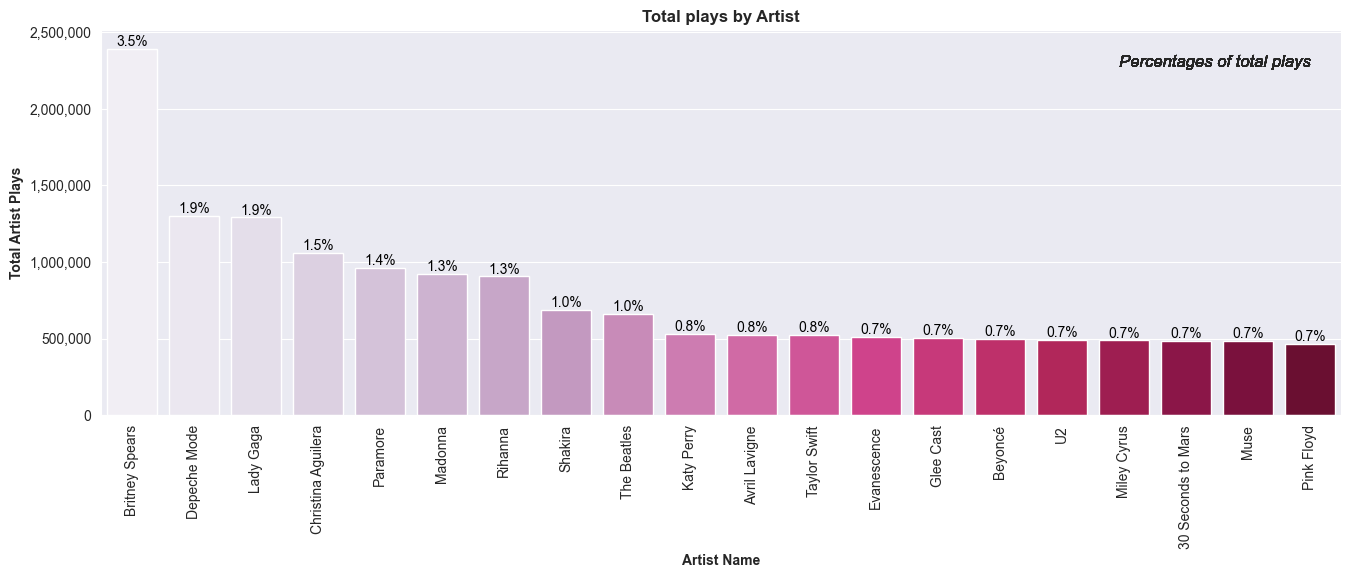

In [146]:
bar_chart(artist_rank.index, artist_rank.totalArtistWeight, 'Artist Name', 'Total Artist Plays', 'Total plays by Artist', 'Percentages of total plays', artist_rank.totalArtistWeight.sum())

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


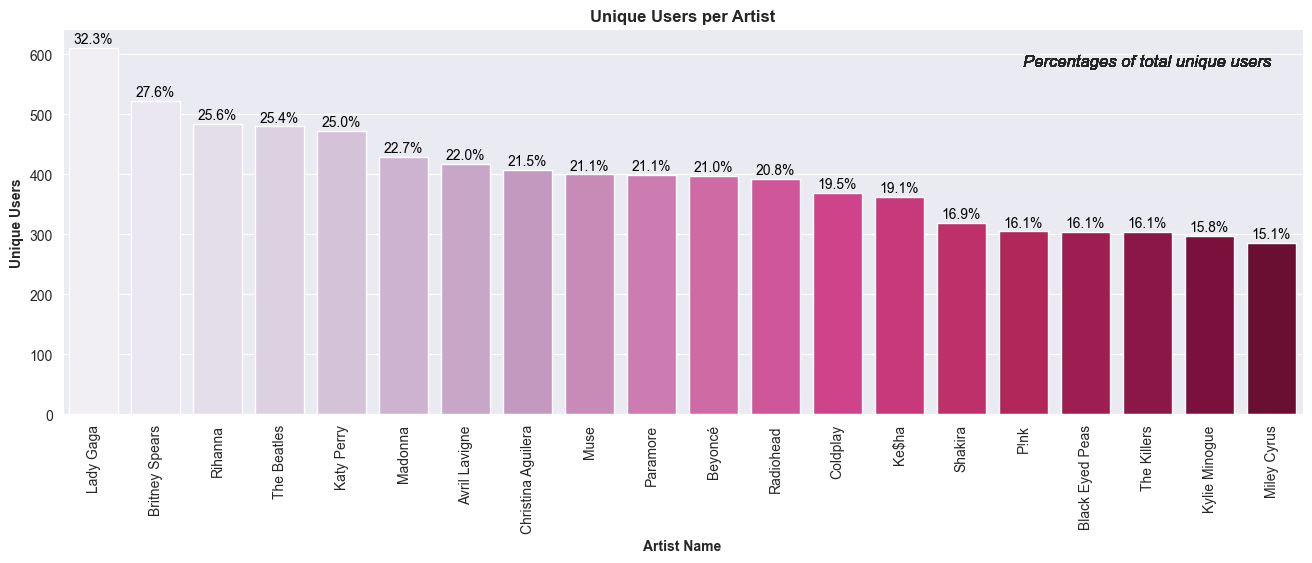

In [147]:
t = artist_rank.sort_values(['totalUniqueUsers'], ascending=False)
bar_chart(t.index, t.totalUniqueUsers, 'Artist Name', 'Unique Users', 'Unique Users per Artist', 'Percentages of total unique users', original.userID.nunique())